In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
import pandas as pd

In [62]:
resumeDataSet = pd.read_csv('UpdatedResumeDataSet.csv' ,encoding='utf-8')
resumeDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [63]:
resumeDataSet.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [64]:
#count the number of job categories
print(resumeDataSet['Category'].value_counts())


Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


In [65]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))
resumeDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        962 non-null    object
 1   Resume          962 non-null    object
 2   cleaned_resume  962 non-null    object
dtypes: object(3)
memory usage: 22.7+ KB


In [66]:
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


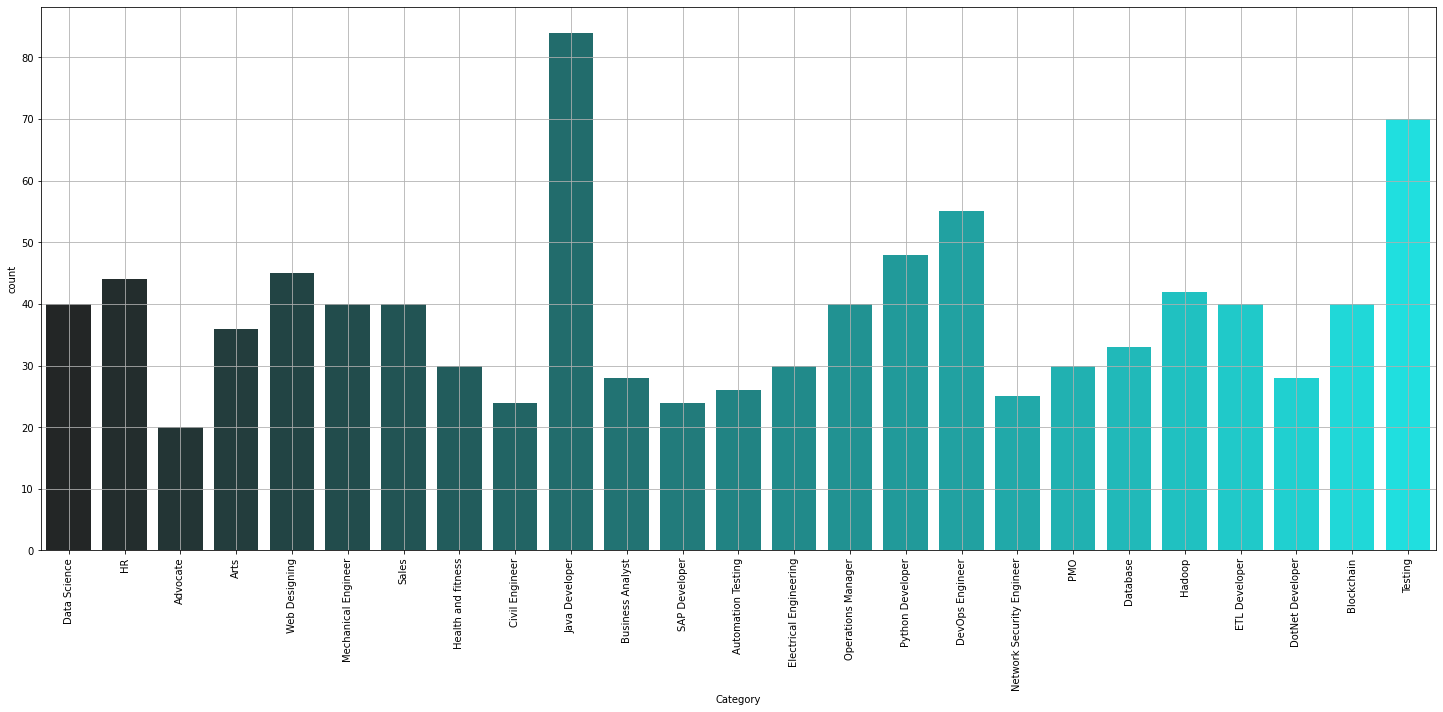

In [67]:
plt.figure(figsize=(25,10))
cplt=sns.countplot(x="Category", data=resumeDataSet, palette='dark:cyan')
cplt.set_xticklabels(cplt.get_xticklabels(), rotation=90)
plt.grid()

In [68]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

StopWords = set(stopwords.words('english')+['``',"''"])
allwords =[]
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in StopWords and word not in string.punctuation:
            allwords.append(word)
    
wordfreq = nltk.FreqDist(allwords)
mostcommon = wordfreq.most_common(50)
print(mostcommon)

[('Exprience', 3829), ('months', 3233), ('company', 3130), ('Details', 2967), ('description', 2634), ('1', 2134), ('Project', 1808), ('project', 1579), ('6', 1499), ('data', 1438), ('team', 1424), ('Maharashtra', 1385), ('year', 1244), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('Management', 1010), ('SQL', 990), ('Ltd', 934), ('management', 927), ('C', 896), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('Java', 773), ('2', 754), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('I', 690), ('various', 688), ('A', 688), ('Data', 674), ('The', 672), ('University', 656), ('process', 648), ('Testing', 646), ('test', 638), ('Responsibilities', 637), ('system', 636), ('testing', 634), ('Software', 632)]


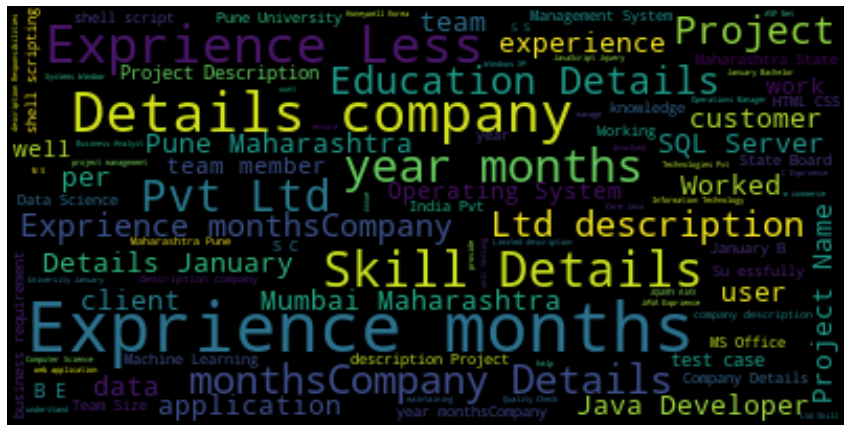

In [69]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
resumeDataSet['Category'] = le.fit_transform(resumeDataSet['Category'])

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)

In [72]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_prediction = knn_model.predict(X_test)
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(accuracy_score(y_test, knn_prediction)))



Accuracy of KNeighbors Classifier on test set:     0.98


In [73]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_prediction = rf_model.predict(X_test)
print('Accuracy of RandomForest Classifier on test set:     {:.2f}'.format(accuracy_score(y_test, rf_prediction)))

Accuracy of RandomForest Classifier on test set:     0.99


In [74]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_prediction = nb_model.predict(X_test)
print('Accuracy of Naive Bayes Classifier on test set:     {:.2f}'.format(accuracy_score(y_test, nb_prediction)))

Accuracy of Naive Bayes Classifier on test set:     0.96
